# Importing required libraries

In [1]:
import pandas as pd                    #pandas used for dataframe , data processing
import missingno as msno               #missng value visulisation
from matplotlib import pyplot as plt   #plotting 
import numpy as np                     #Data wrangling
import plotly.express as px            #interactive plots
import seaborn as sns                  #ploting 
import pycountry                       #convert 2digit county code to full names 


sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")




In [2]:
cd C:\Users\moeen\OneDrive - Higher Education Commission\Documents\einbliq\glacier-thickness-moeen\1_data

C:\Users\moeen\OneDrive - Higher Education Commission\Documents\einbliq\glacier-thickness-moeen\1_data


In [3]:
#creating pandas datafram from csv 
df = pd.read_csv('TTT.csv')
df

GlaThiDa_ID POLITICAL_UNIT  GLACIER_NAME  SURVEY_DATE PROFILE_ID  \
0                 33             US        EASTON   19929999.0        NaN   
1                 33             US        EASTON   19929999.0        NaN   
2                 33             US        EASTON   19929999.0        NaN   
3                 33             US        EASTON   19929999.0        NaN   
4                 33             US        EASTON   19929999.0        NaN   
...              ...            ...           ...          ...        ...   
3854274         6630             AT  MULLWITZKEES   19989999.0        NaN   
3854275         6630             AT  MULLWITZKEES   19989999.0        NaN   
3854276         6630             AT  MULLWITZKEES   19989999.0        NaN   
3854277         6630             AT  MULLWITZKEES   19989999.0        NaN   
3854278         6631             AT  MULLWITZKEES   20039999.0        NaN   

        POINT_ID  POINT_LAT   POINT_LON  ELEVATION  THICKNESS  \
0            1.0  48.767380 -121.819644     2962.0          0   
1            2.0  48.764904 -121.821909     2813.0         29   
2            3.0  48.761662 -121.825264     2598.0         41   
3            4.0  48.757063 -121.829107     2383.0         71   
4            5.0  48.753715 -121.832006     2284.0         82   
...          ...        ...         ...        ...        ...   
3854274       27  47.092690   12.380504     3329.0         36   
3854275       28  47.093780   12.379642     3353.0         26   
3854276       29  47.094839   12.378200     3381.0         39   
3854277       30  47.094829   12.378174     3381.0         39   
3854278        1  47.094853   12.374525     3369.0         50   

         THICKNESS_UNCERTAINTY  DATA_FLAG REMARKS  
0                          NaN        NaN     NaN  
1                          NaN        NaN     NaN  
2                          NaN        NaN     NaN  
3                          NaN        NaN     NaN  
4                          NaN        NaN     NaN  
...                        ...        ...     ...  
3854274                    4.0        NaN     NaN  
3854275                    3.0        NaN     NaN  
3854276                    4.0        NaN     NaN  
3854277                    4.0        NaN     NaN  
3854278                    5.0        NaN     NaN  

[3854279 rows x 13 columns]

In [4]:
#creating new column SURVEY_YEAR 

df['SURVEY_DATE'] = df['SURVEY_DATE'].astype(str)
df['SURVEY_YEAR'] = df.SURVEY_DATE.str[:4]

In [5]:
#Avereg thickness and elevation for each survey
df['THICKNESS_MEAN'] = df.groupby(['GlaThiDa_ID'])['THICKNESS'].transform('mean')
df['ELEVATION_MEAN'] = df.groupby(['GlaThiDa_ID'])['ELEVATION'].transform('mean')

In [6]:
#conveting 2digit code to full names

list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]

def country_names(df):
    if (len(df['POLITICAL_UNIT'])==2 and df['POLITICAL_UNIT'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['POLITICAL_UNIT']).name 
    else:
        return 'Invalid Code'

df['COUNTRY_NAME']=df.apply(country_names, axis = 1)
df

GlaThiDa_ID POLITICAL_UNIT  GLACIER_NAME SURVEY_DATE PROFILE_ID  \
0                 33             US        EASTON  19929999.0        NaN   
1                 33             US        EASTON  19929999.0        NaN   
2                 33             US        EASTON  19929999.0        NaN   
3                 33             US        EASTON  19929999.0        NaN   
4                 33             US        EASTON  19929999.0        NaN   
...              ...            ...           ...         ...        ...   
3854274         6630             AT  MULLWITZKEES  19989999.0        NaN   
3854275         6630             AT  MULLWITZKEES  19989999.0        NaN   
3854276         6630             AT  MULLWITZKEES  19989999.0        NaN   
3854277         6630             AT  MULLWITZKEES  19989999.0        NaN   
3854278         6631             AT  MULLWITZKEES  20039999.0        NaN   

        POINT_ID  POINT_LAT   POINT_LON  ELEVATION  THICKNESS  \
0            1.0  48.767380 -121.819644     2962.0          0   
1            2.0  48.764904 -121.821909     2813.0         29   
2            3.0  48.761662 -121.825264     2598.0         41   
3            4.0  48.757063 -121.829107     2383.0         71   
4            5.0  48.753715 -121.832006     2284.0         82   
...          ...        ...         ...        ...        ...   
3854274       27  47.092690   12.380504     3329.0         36   
3854275       28  47.093780   12.379642     3353.0         26   
3854276       29  47.094839   12.378200     3381.0         39   
3854277       30  47.094829   12.378174     3381.0         39   
3854278        1  47.094853   12.374525     3369.0         50   

         THICKNESS_UNCERTAINTY  DATA_FLAG REMARKS SURVEY_YEAR  THICKNESS_MEAN  \
0                          NaN        NaN     NaN        1992       58.875000   
1                          NaN        NaN     NaN        1992       58.875000   
2                          NaN        NaN     NaN        1992       58.875000   
3                          NaN        NaN     NaN        1992       58.875000   
4                          NaN        NaN     NaN        1992       58.875000   
...                        ...        ...     ...         ...             ...   
3854274                    4.0        NaN     NaN        1998       53.233333   
3854275                    3.0        NaN     NaN        1998       53.233333   
3854276                    4.0        NaN     NaN        1998       53.233333   
3854277                    4.0        NaN     NaN        1998       53.233333   
3854278                    5.0        NaN     NaN        2003       50.000000   

         ELEVATION_MEAN   COUNTRY_NAME  
0           2008.234375  United States  
1           2008.234375  United States  
2           2008.234375  United States  
3           2008.234375  United States  
4           2008.234375  United States  
...                 ...            ...  
3854274     3105.600000        Austria  
3854275     3105.600000        Austria  
3854276     3105.600000        Austria  
3854277     3105.600000        Austria  
3854278     3369.000000        Austria  

[3854279 rows x 17 columns]

In [7]:
df['COUNTRY_NAME'].value_counts()

Canada                             1184552
Svalbard and Jan Mayen              966408
Greenland                           557136
Antarctica                          537560
Switzerland                         465502
United States                        83810
Norway                               10801
Kazakhstan                            8568
Chile                                 8463
Mongolia                              7051
China                                 6081
Italy                                 5814
Germany                               3506
Austria                               3490
Russian Federation                    2278
Kyrgyzstan                            1353
Bolivia, Plurinational State of        728
New Zealand                            619
Colombia                               351
Tanzania, United Republic of           208
Name: COUNTRY_NAME, dtype: int64

# Understanding data

In [8]:
df[df.GlaThiDa_ID == 33] #64 servey points 

GlaThiDa_ID POLITICAL_UNIT GLACIER_NAME SURVEY_DATE PROFILE_ID POINT_ID  \
0            33             US       EASTON  19929999.0        NaN      1.0   
1            33             US       EASTON  19929999.0        NaN      2.0   
2            33             US       EASTON  19929999.0        NaN      3.0   
3            33             US       EASTON  19929999.0        NaN      4.0   
4            33             US       EASTON  19929999.0        NaN      5.0   
..          ...            ...          ...         ...        ...      ...   
59           33             US       EASTON  19929999.0        NaN     60.0   
60           33             US       EASTON  19929999.0        NaN     61.0   
61           33             US       EASTON  19929999.0        NaN     62.0   
62           33             US       EASTON  19929999.0        NaN     63.0   
63           33             US       EASTON  19929999.0        NaN     64.0   

    POINT_LAT   POINT_LON  ELEVATION  THICKNESS  THICKNESS_UNCERTAINTY  \
0   48.767380 -121.819644     2962.0          0                    NaN   
1   48.764904 -121.821909     2813.0         29                    NaN   
2   48.761662 -121.825264     2598.0         41                    NaN   
3   48.757063 -121.829107     2383.0         71                    NaN   
4   48.753715 -121.832006     2284.0         82                    NaN   
..        ...         ...        ...        ...                    ...   
59  48.757103 -121.830393     2381.0         39                    NaN   
60  48.757101 -121.829648     2383.0         39                    NaN   
61  48.756989 -121.829005     2380.0         61                    NaN   
62  48.756878 -121.828380     2380.0         39                    NaN   
63  48.756751 -121.827906     2380.0         22                    NaN   

    DATA_FLAG REMARKS SURVEY_YEAR  THICKNESS_MEAN  ELEVATION_MEAN  \
0         NaN     NaN        1992          58.875     2008.234375   
1         NaN     NaN        1992          58.875     2008.234375   
2         NaN     NaN        1992          58.875     2008.234375   
3         NaN     NaN        1992          58.875     2008.234375   
4         NaN     NaN        1992          58.875     2008.234375   
..        ...     ...         ...             ...             ...   
59        NaN     NaN        1992          58.875     2008.234375   
60        NaN     NaN        1992          58.875     2008.234375   
61        NaN     NaN        1992          58.875     2008.234375   
62        NaN     NaN        1992          58.875     2008.234375   
63        NaN     NaN        1992          58.875     2008.234375   

     COUNTRY_NAME  
0   United States  
1   United States  
2   United States  
3   United States  
4   United States  
..            ...  
59  United States  
60  United States  
61  United States  
62  United States  
63  United States  

[64 rows x 17 columns]

In [9]:
df[df.GLACIER_NAME == 'AUSTFONNA'].GlaThiDa_ID.unique() #sinle glacier can have multiple surveys

array([2190, 2193, 2194, 2195, 2196, 2197, 2198, 2221, 2358, 2359, 2362,
       2363, 5536], dtype=int64)

In [10]:
df.groupby('GLACIER_NAME')['GlaThiDa_ID'].value_counts()[100:120]


GLACIER_NAME                GlaThiDa_ID
AUSTFONNA                   2358             813
                            2197             800
                            2190             751
                            5536             682
                            2198             573
                            2221             270
                            2362             241
AUSTFONNA BASIN 3           2192           61269
                            2191            4781
                            5535            4680
AUSTFONNA DUVEBREEN         2357           47233
                            2355             805
                            2356               1
AUSTFONNA LEIGHBREEN        5540            1202
                            2223            1048
AUSTFONNA NILSENBREEN       2317             607
AUSTFONNA SCHWEIGAARDBREEN  2318            1339
                            2319            1131
AUSTFONNA SEXEBREEN         2316             398
AUSTFONNA WINSNESBREEN      2

In [11]:
'''
GlaThiDa_ID 
Unique identifier assigned by the World Glacier Monitoring Service (WGMS) to each survey.
Links the corresponding entries in tables 
'''
print("Total number of Surveys", df.GlaThiDa_ID.nunique() )


Total number of Surveys 4681


In [12]:
df.GLACIER_NAME.nunique()

526

In [13]:
df.GLACIER_NAME.isnull().sum()

1402056

In [14]:
df.info(memory_usage = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854279 entries, 0 to 3854278
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   GlaThiDa_ID            3854279 non-null  int64  
 1   POLITICAL_UNIT         3854279 non-null  object 
 2   GLACIER_NAME           2452223 non-null  object 
 3   SURVEY_DATE            3854279 non-null  object 
 4   PROFILE_ID             2390505 non-null  object 
 5   POINT_ID               3854279 non-null  object 
 6   POINT_LAT              3854279 non-null  float64
 7   POINT_LON              3854279 non-null  float64
 8   ELEVATION              3372834 non-null  float64
 9   THICKNESS              3854279 non-null  int64  
 10  THICKNESS_UNCERTAINTY  1524587 non-null  float64
 11  DATA_FLAG              1 non-null        float64
 12  REMARKS                2168236 non-null  object 
 13  SURVEY_YEAR            3854279 non-null  object 
 14  THICKNESS_MEAN    

# Missing values 

<AxesSubplot:>

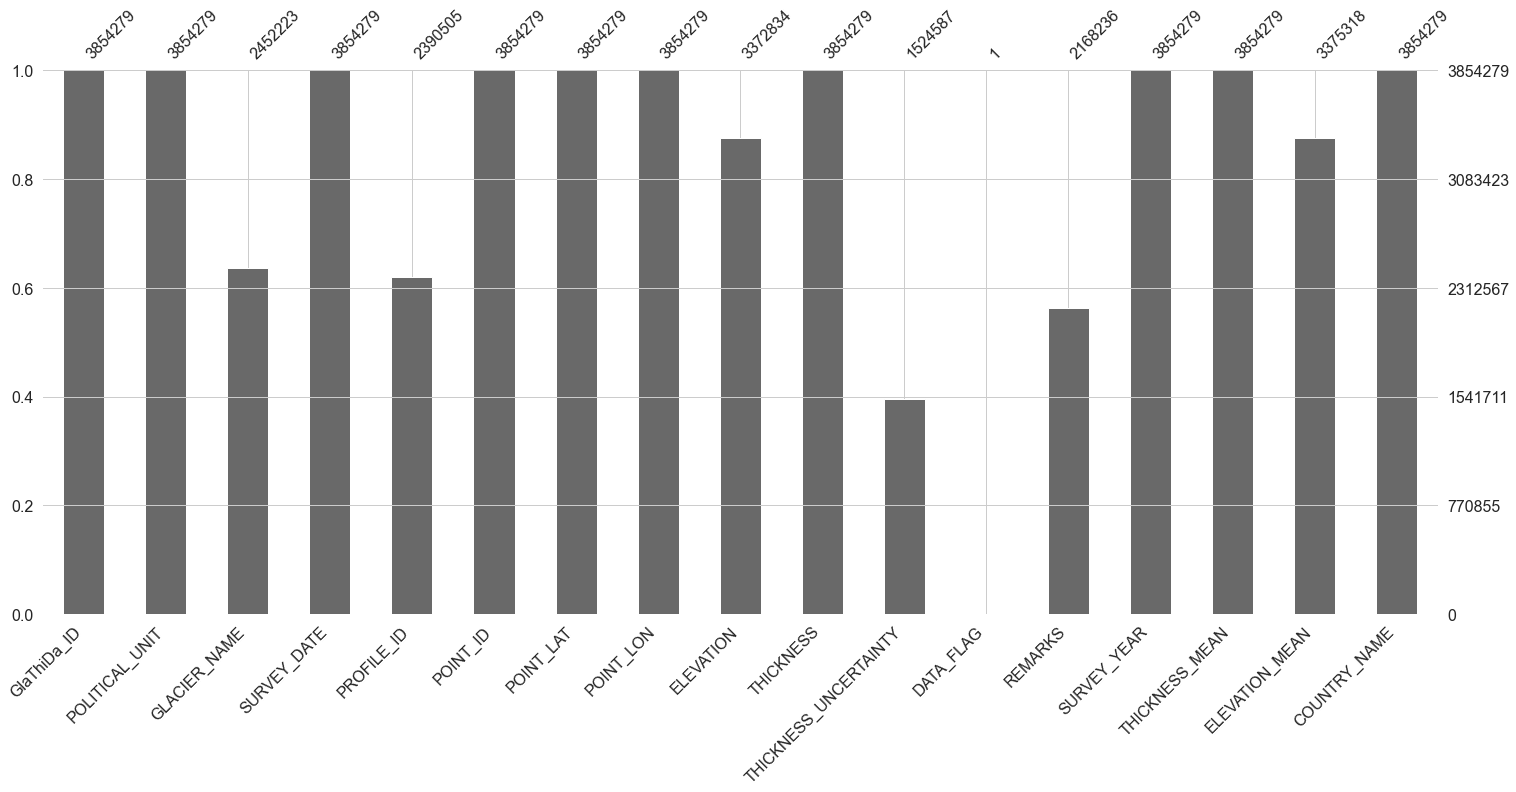

In [15]:
msno.bar(df)


<AxesSubplot:>

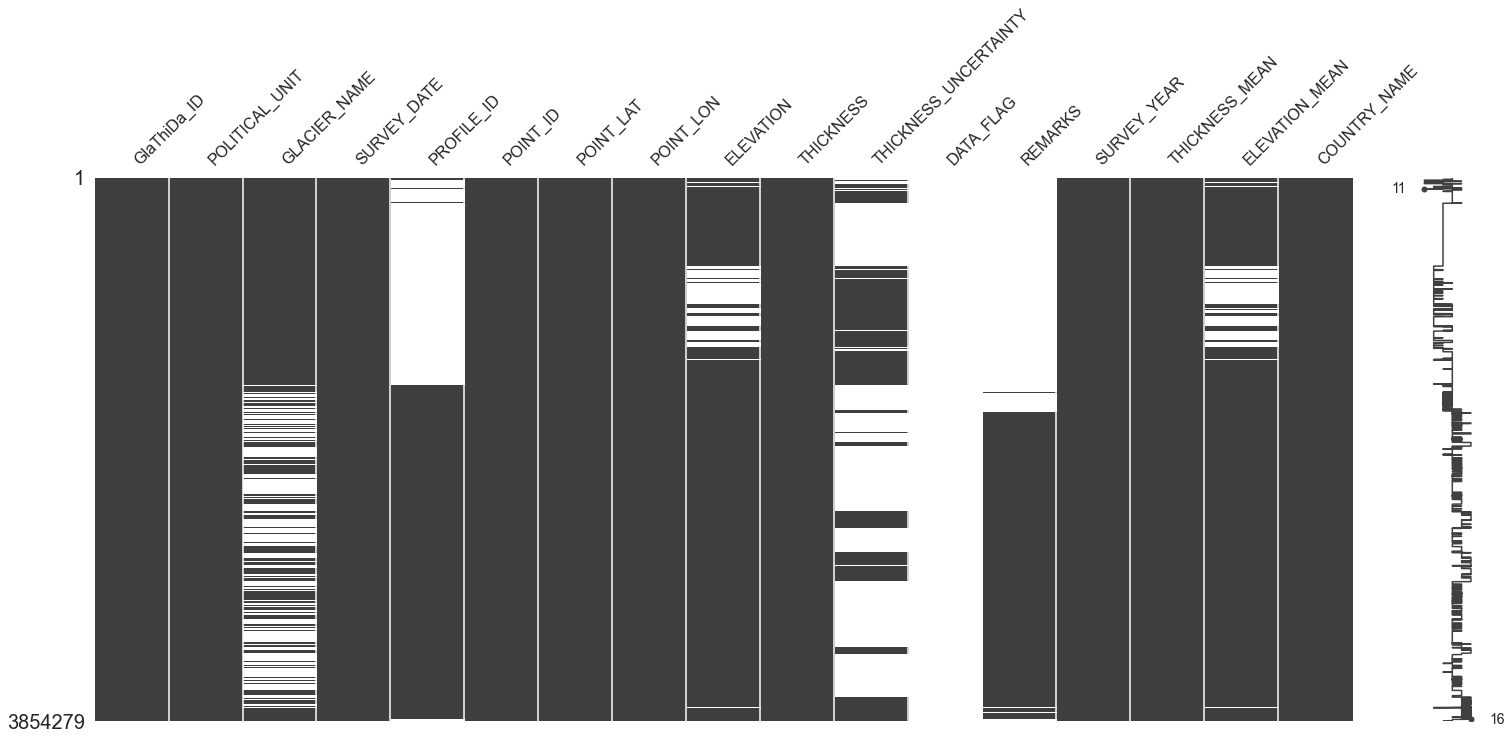

In [16]:
msno.matrix(df)

In [17]:
df.DATA_FLAG.value_counts()

1.0    1
Name: DATA_FLAG, dtype: int64

In [18]:
df[df.DATA_FLAG.notnull()]              

GlaThiDa_ID POLITICAL_UNIT        GLACIER_NAME SURVEY_DATE PROFILE_ID  \
25574         1961             AT  GROSSER RIEPENKEES  19989999.0        NaN   

      POINT_ID  POINT_LAT  POINT_LON  ELEVATION  THICKNESS  \
25574     20.0  47.056622  11.672612     3014.0       2530   

       THICKNESS_UNCERTAINTY  DATA_FLAG REMARKS SURVEY_YEAR  THICKNESS_MEAN  \
25574                  253.0        1.0     NaN        1998       95.333333   

       ELEVATION_MEAN COUNTRY_NAME  
25574     2972.214286      Austria

# Visualization 1

Gruop with SURVEY_YEAR, then find number of unique GlaThiDa_ID in those groups, create new df, plot as line graph


<AxesSubplot:xlabel='SURVEY_YEAR'>

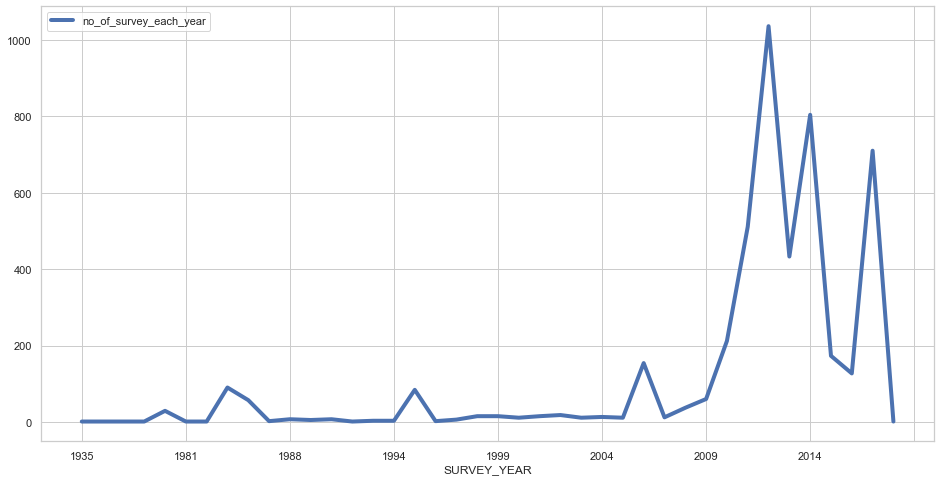

In [19]:
df_year=df.copy()
df_year = df_year[df.SURVEY_DATE != 'nan']
df_year.groupby(by = ["SURVEY_YEAR"])['GlaThiDa_ID'].nunique().to_frame(name= 'no_of_survey_each_year').reset_index().plot(kind='line', x='SURVEY_YEAR' , lw=4,  figsize=(16,8))


<AxesSubplot:>

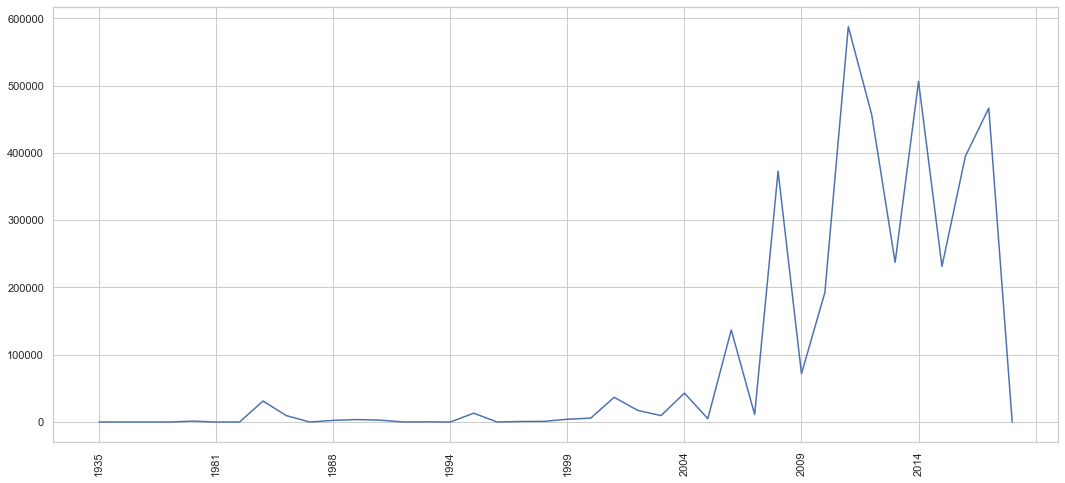

In [20]:
df_year.sort_values(by='SURVEY_YEAR').reset_index(drop=True).SURVEY_YEAR.value_counts(sort= False).plot(kind = 'line', figsize=(18,8), rot=90, )


# Visualization 2

Group the data with COUNTRY_NAME, then finding number of unique GlaThiDa_ID, saving results in new df, df_survey,  plot as bar chart

Text(0, 0.5, '')

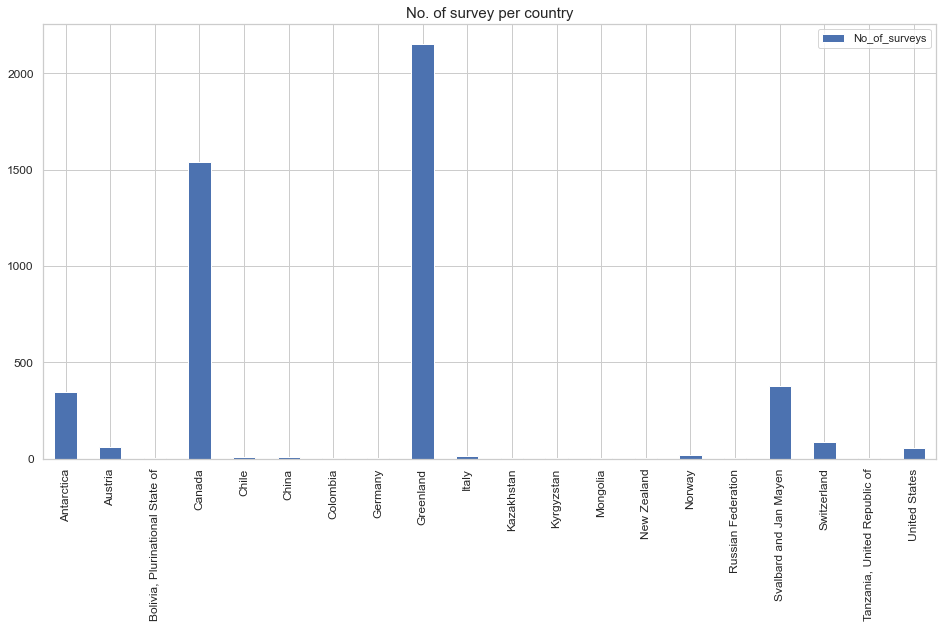

In [21]:
df_survey = df.groupby(by = ["COUNTRY_NAME",])['GlaThiDa_ID'].nunique().to_frame(name= 'No_of_surveys').reset_index()
df_survey.plot(kind='bar', x='COUNTRY_NAME' ,  figsize=(16,8),  fontsize=12)
plt.title('No. of survey per country', fontsize=15)
plt.xlabel('', fontsize=0)
plt.ylabel('', fontsize=16)

In [22]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df_survey.COUNTRY_NAME, values=df_survey.No_of_surveys, pull=[0.045]*20)], )
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update(layout_title_text='Surveys percentage by country',)

fig.show()

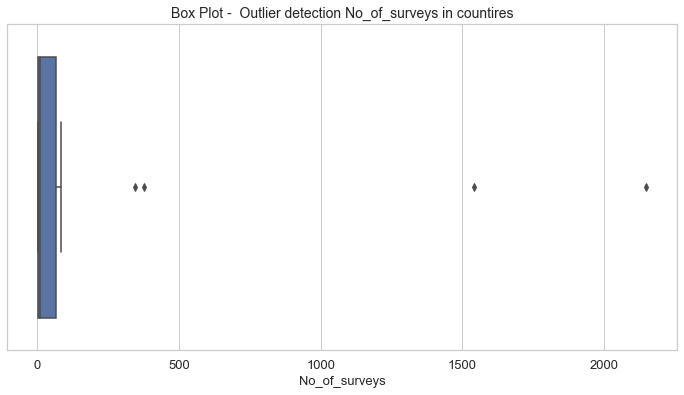

In [23]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x=df_survey["No_of_surveys"],)

ax.axes.set_title("Box Plot -  Outlier detection No_of_surveys in countires",fontsize=14, )
ax.set_xlabel("No_of_surveys",fontsize=13)
ax.tick_params(labelsize=13)


# Visualization 3

ELEVATION vs THICKNESS with hue on COUNTRY_NAME

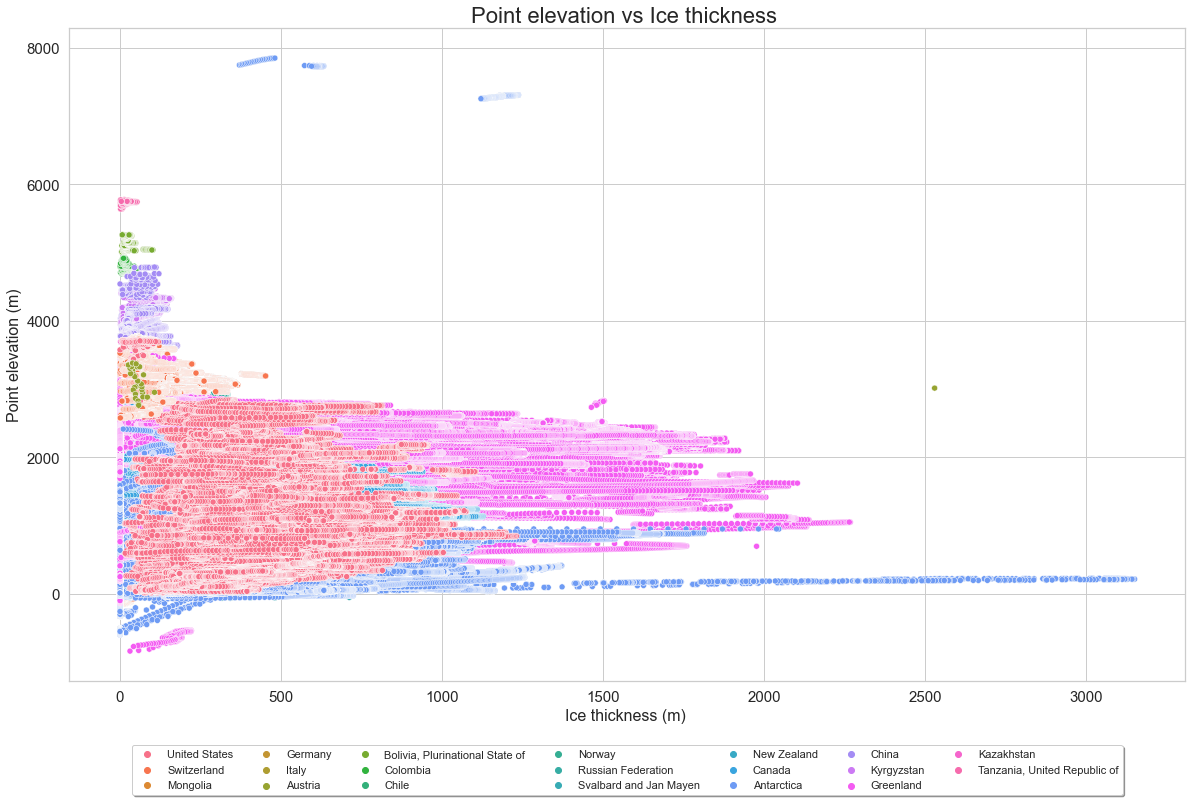

[]

In [24]:
plt.figure(figsize=(20,12))

ax= sns.scatterplot(data=df, y="ELEVATION", x="THICKNESS", hue ='COUNTRY_NAME' , )
ax.axes.set_title("Point elevation vs Ice thickness ",fontsize=22)
ax.set_xlabel("Ice thickness (m) ",fontsize=16)
ax.set_ylabel("Point elevation (m)",fontsize=16)
plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.tick_params(labelsize=15)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09),
          fancybox=1, shadow=1, ncol=7)

plt.show()
ax.plot()

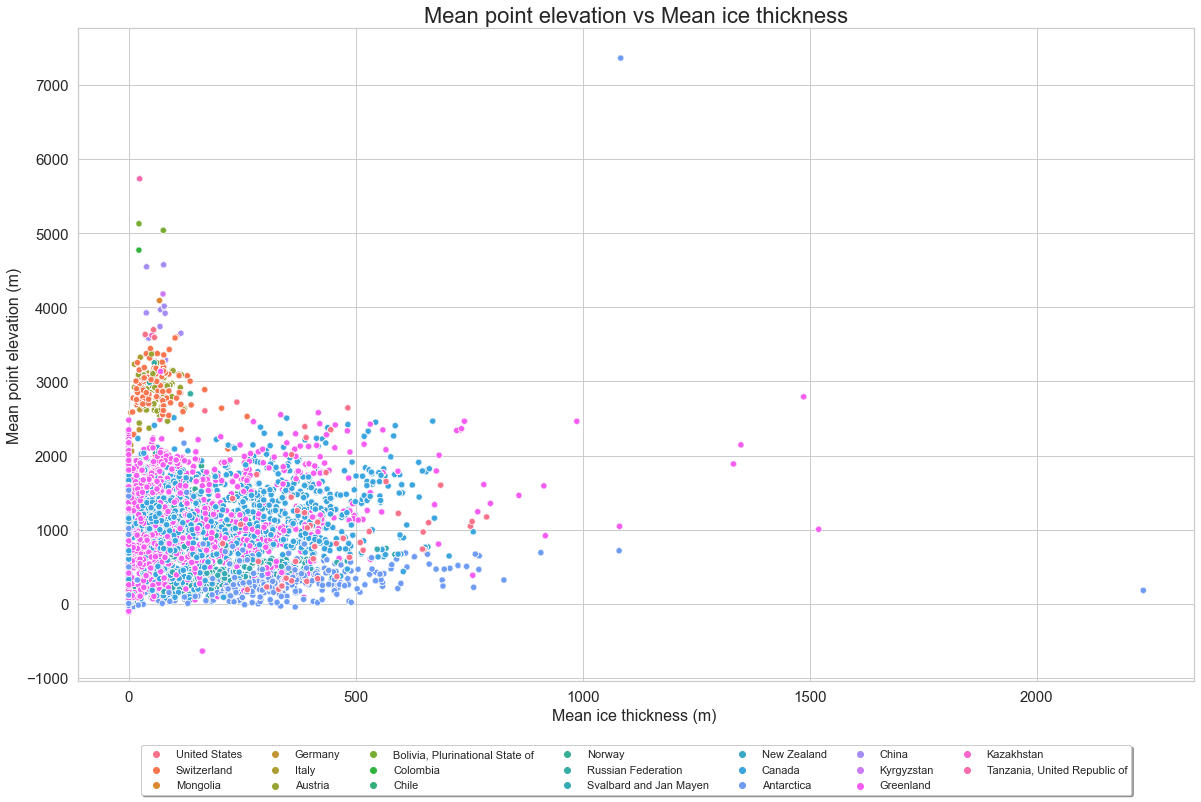

[]

In [25]:
plt.figure(figsize=(20,12))

ax= sns.scatterplot(data=df, y="ELEVATION_MEAN", x="THICKNESS_MEAN", hue ='COUNTRY_NAME' , )
ax.axes.set_title("Mean point elevation vs Mean ice thickness",fontsize=22)
ax.set_xlabel("Mean ice thickness (m) ",fontsize=16)
ax.set_ylabel("Mean point elevation (m)",fontsize=16)
plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.tick_params(labelsize=15)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09),
          fancybox=1, shadow=1, ncol=7)

plt.show()
ax.plot()

# Visualization 4, 5

THICKNESS/ELEVATION vs COUNTRY_NAME , hue on COUNTRY_NAME 

[Text(0, 0.5, '')]

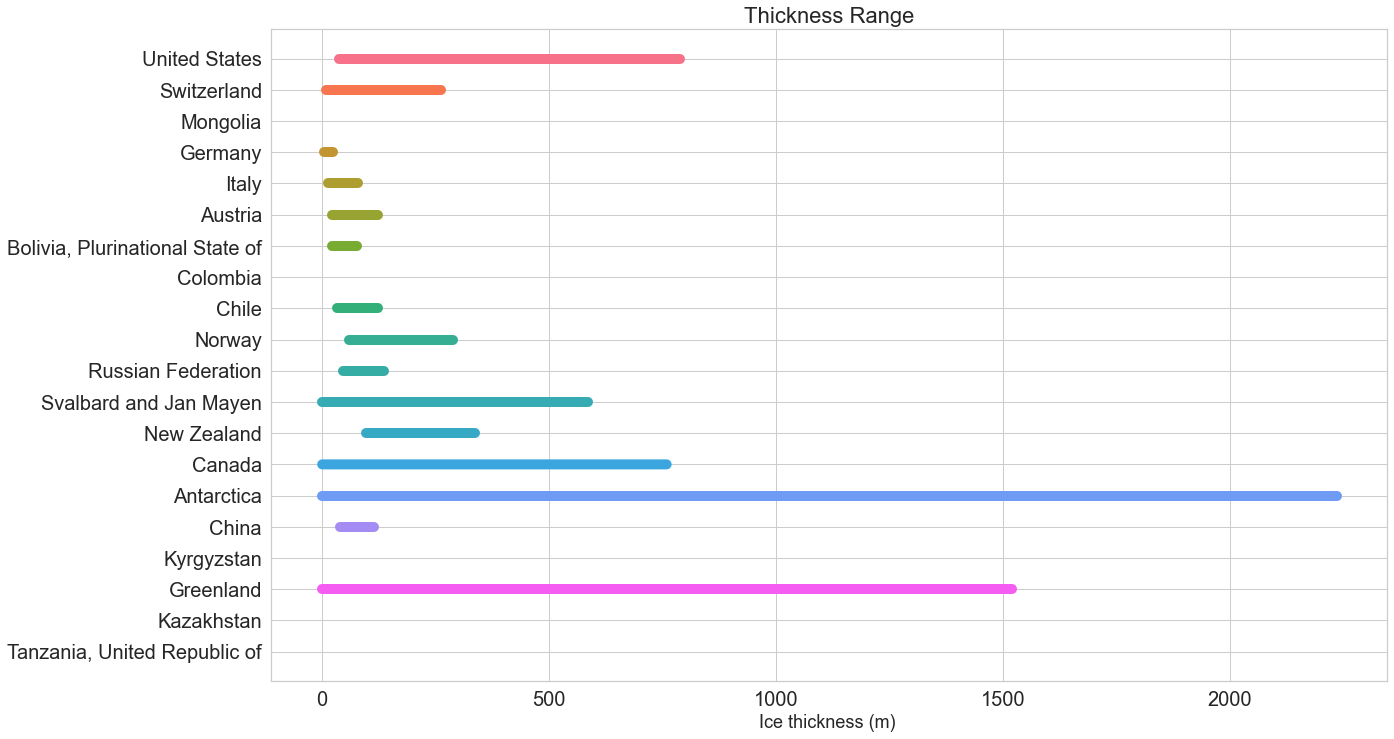

In [38]:
plt.figure(figsize=(20,12))

ax=sns.lineplot(y=df.COUNTRY_NAME, x=df.THICKNESS_MEAN, hue=df.COUNTRY_NAME, markers=True,  linewidth = 10)
ax.axes.set_title("Thickness Range",fontsize=22)
ax.tick_params(labelsize=20)
ax.set_xlabel("Ice thickness (m) ",fontsize=18)
ax.get_legend().remove()
ax.set(ylabel=None)




[Text(0, 0.5, '')]

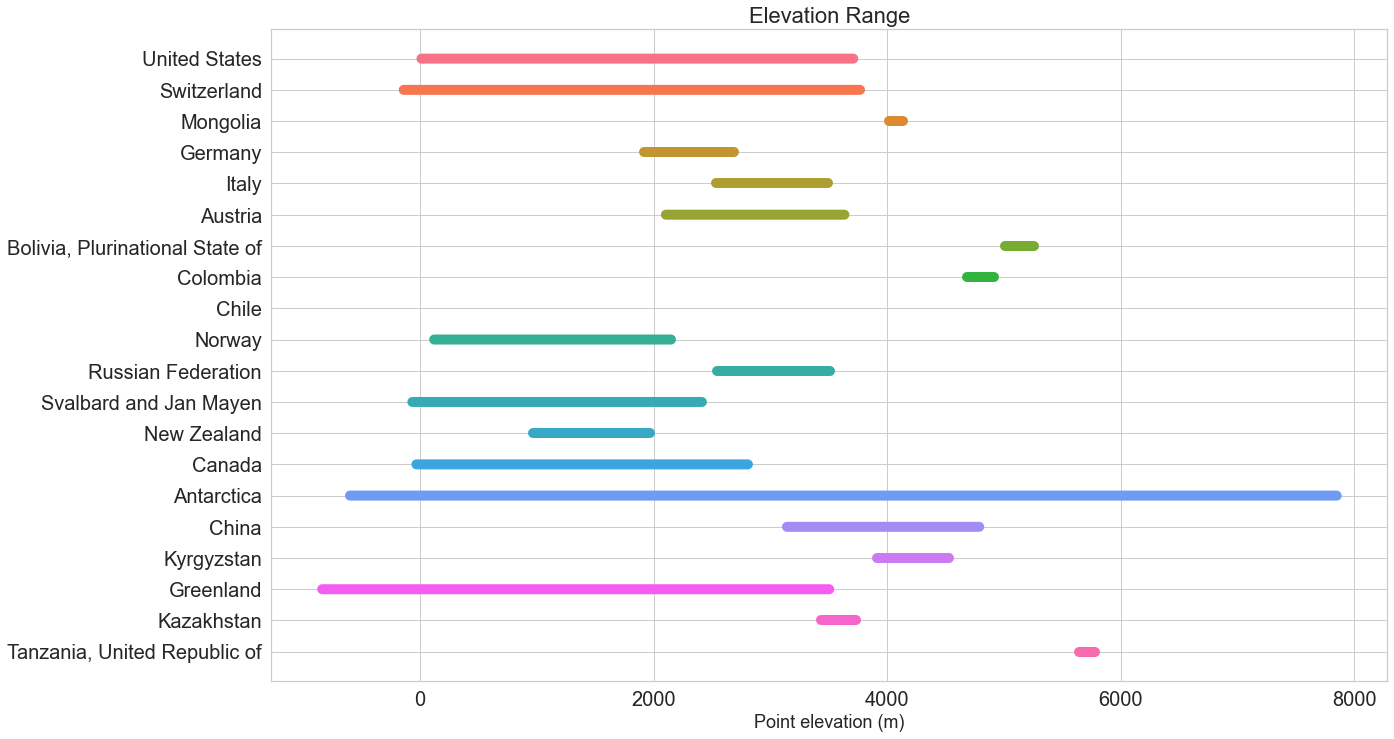

In [27]:

plt.figure(figsize=(20,12))

ax=sns.lineplot(y=df.COUNTRY_NAME, x=df.ELEVATION, hue=df.COUNTRY_NAME, markers=True,  linewidth = 10)
ax.axes.set_title("Elevation Range",fontsize=22)
ax.tick_params(labelsize=20)
ax.set_xlabel("Point elevation (m)",fontsize=18)
ax.get_legend().remove()
ax.set(ylabel=None)



# Visualization 6

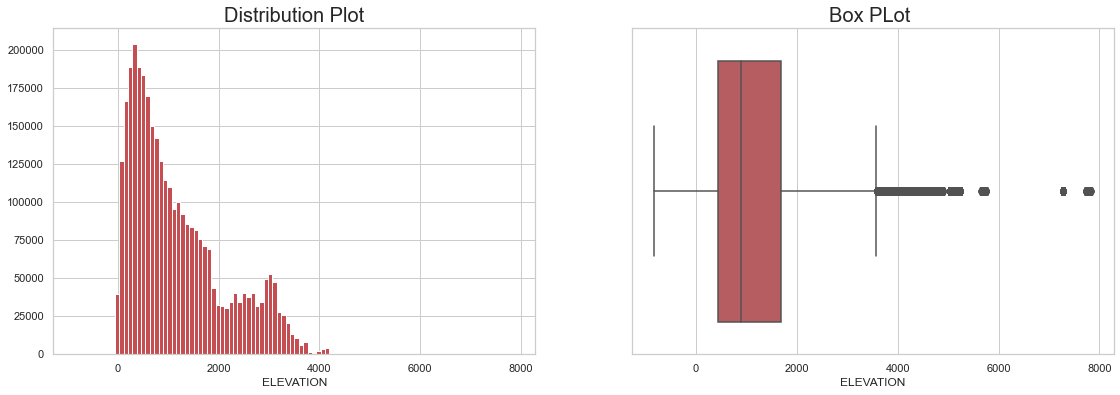

In [28]:
fig, ax =plt.subplots(1,2, figsize=(19,6))
sns.distplot(df.ELEVATION, kde=False , bins=100, hist_kws=dict(alpha=1),ax=ax[0],color='r')
sns.boxplot(x=df["ELEVATION"],ax=ax[1],color='r')
ax[0].set_title('Distribution Plot',fontsize=20)
ax[1].set_title('Box PLot ', fontsize=20)
fig.show()

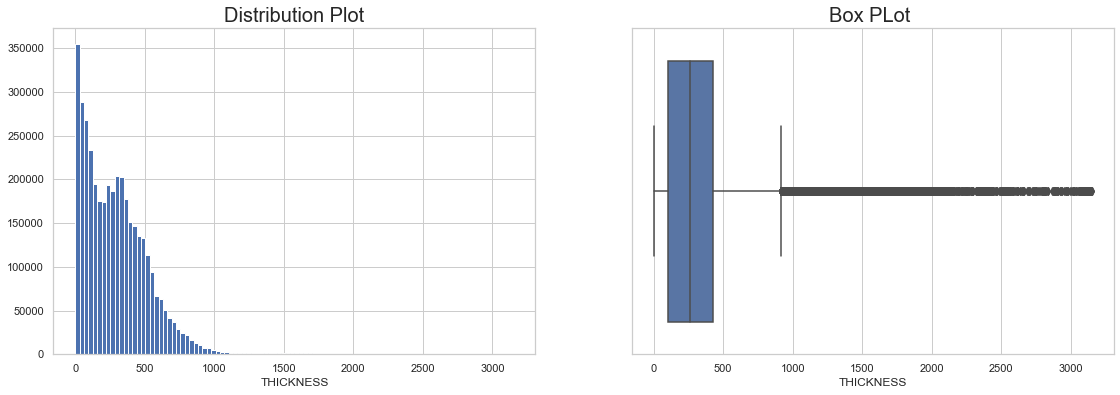

In [29]:
fig, ax =plt.subplots(1,2, figsize=(19,6))
sns.distplot(df.THICKNESS,kde=False , bins=100, hist_kws=dict(alpha=1),ax=ax[0])
sns.boxplot(x=df["THICKNESS"],ax=ax[1])
ax[0].set_title('Distribution Plot',fontsize=20)
ax[1].set_title('Box PLot ', fontsize=20)

fig.show()

# Visualization 7

Creating new df with "GlaThiDa_ID", 'POINT_LAT', 'POINT_LON', 'POLITICAL_UNIT'

since dataset is huge cannot analyse into ram (8gb), so I rather calculated mean values for POINT_LAT and POINT_LON for each survey

Gruoped with GlaThiDa_ID, get only first row 

Still I was having memory issues , so just ploted random 1500 values out of 4681 

In [30]:
df_map =df[["GlaThiDa_ID", 'POINT_LAT', 'POINT_LON', 'POLITICAL_UNIT']]
df_map['POINT_LAT_MEAN'] = df_map.groupby(['GlaThiDa_ID'])['POINT_LAT'].transform('mean')
df_map['POINT_LON_MEAN'] = df_map.groupby(['GlaThiDa_ID'])['POINT_LON'].transform('mean')

In [31]:
df_map

GlaThiDa_ID  POINT_LAT   POINT_LON POLITICAL_UNIT  POINT_LAT_MEAN  \
0                 33  48.767380 -121.819644             US       48.745119   
1                 33  48.764904 -121.821909             US       48.745119   
2                 33  48.761662 -121.825264             US       48.745119   
3                 33  48.757063 -121.829107             US       48.745119   
4                 33  48.753715 -121.832006             US       48.745119   
...              ...        ...         ...            ...             ...   
3854274         6630  47.092690   12.380504             AT       47.085893   
3854275         6630  47.093780   12.379642             AT       47.085893   
3854276         6630  47.094839   12.378200             AT       47.085893   
3854277         6630  47.094829   12.378174             AT       47.085893   
3854278         6631  47.094853   12.374525             AT       47.094853   

         POINT_LON_MEAN  
0           -121.833398  
1           -121.833398  
2           -121.833398  
3           -121.833398  
4           -121.833398  
...                 ...  
3854274       12.377163  
3854275       12.377163  
3854276       12.377163  
3854277       12.377163  
3854278       12.374525  

[3854279 rows x 6 columns]

In [32]:
df_map.groupby(by = ["GlaThiDa_ID",]).first().reset_index()

GlaThiDa_ID  POINT_LAT   POINT_LON POLITICAL_UNIT  POINT_LAT_MEAN  \
0              33  48.767380 -121.819644             US       48.745119   
1             319  63.285390 -145.386094             US       63.270479   
2             362  46.960842    9.390133             CH       46.959714   
3             466  48.655678   90.846654             MN       48.653663   
4             486  47.412600   10.976210             DE       47.413710   
...           ...        ...         ...            ...             ...   
4676         6627  46.205898 -121.492611             US       46.208078   
4677         6628  46.215590 -121.477220             US       46.205753   
4678         6629  46.202169 -121.495012             US       46.203379   
4679         6630  47.094272   12.373877             AT       47.085893   
4680         6631  47.094853   12.374525             AT       47.094853   

      POINT_LON_MEAN  
0        -121.833398  
1        -145.421263  
2           9.389290  
3          90.852232  
4          10.974253  
...              ...  
4676     -121.491302  
4677     -121.491538  
4678     -121.493532  
4679       12.377163  
4680       12.374525  

[4681 rows x 6 columns]

In [33]:
import plotly.express as px

fig = px.scatter_geo(df_map.sample(1500),lat='POINT_LAT',lon='POINT_LON', hover_name="POLITICAL_UNIT")
fig.update_layout(title = 'Glacier Locations', title_x=0.5)
fig.show()

# Extras

<AxesSubplot:xlabel='No_of_Survey_Points'>

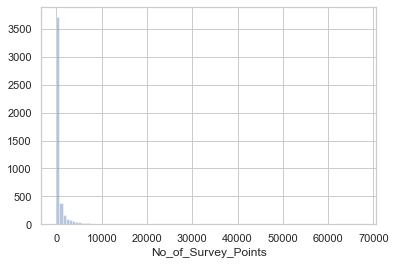

In [34]:
#number of survey in each country 
df_survey_pt=df.groupby(by = ["GlaThiDa_ID",])['POINT_ID'].nunique().to_frame(name= 'No_of_Survey_Points').reset_index()
sns.distplot(df_survey_pt.No_of_Survey_Points,kde=False , bins=100)

<AxesSubplot:xlabel='No_of_Survey_Points'>

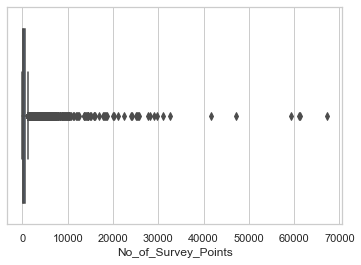

In [35]:
sns.boxplot(x=df_survey_pt["No_of_Survey_Points"])


<AxesSubplot:xlabel='COUNTRY_NAME'>

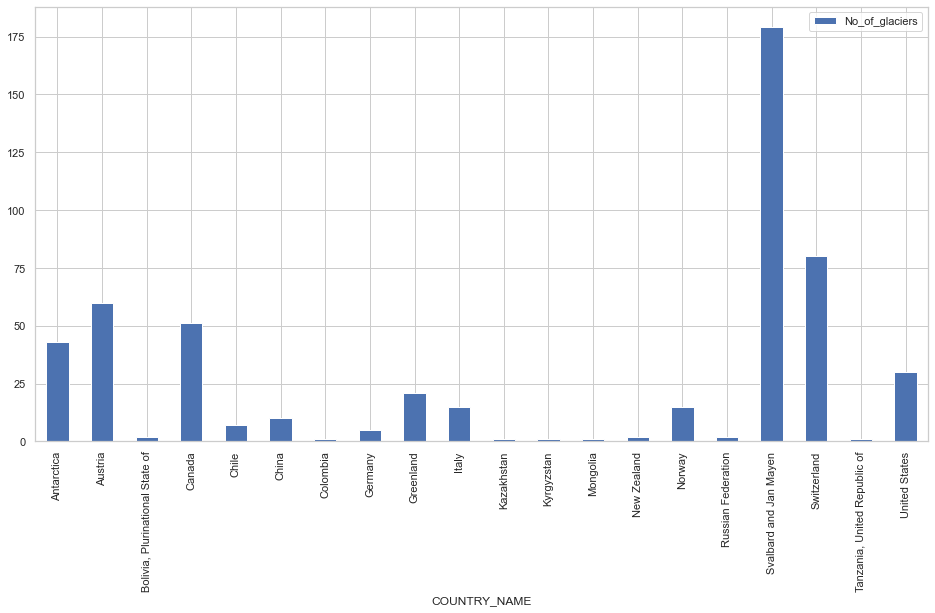

In [36]:
df_glacier=df.groupby(by = ["COUNTRY_NAME",])['GLACIER_NAME'].nunique().to_frame(name= 'No_of_glaciers').reset_index()
df_glacier.plot(kind='bar', x='COUNTRY_NAME' ,  figsize=(16,8), )

[]

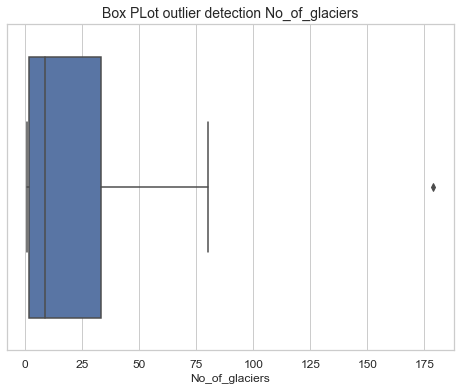

In [37]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x=df_glacier["No_of_glaciers"],)

ax.axes.set_title("Box PLot outlier detection No_of_glaciers",fontsize=14)
ax.set_xlabel("No_of_glaciers",fontsize=12)
ax.tick_params(labelsize=12)
ax.plot()